In [225]:
# By Ulises Zamarripa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


# Feature Engineering

In [191]:
#creating new features using existing
df = pd.read_csv('hotel_bookings.csv')

df['total_guests'] = df['adults'] + df['children'] + df['babies']  # Total people in booking
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']  # Total nights
df['is_family'] = np.where(df['total_guests'] > 2, 1, 0)  # Binary for family bookings
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))
df['arrival_month_num'] = df['arrival_date'].dt.month  # Numeric month for seasonality
df['is_weekend_arrival'] = np.where(df['arrival_date'].dt.weekday >= 5, 1, 0)  # Weekend arrival

print("New features created:")
new_features = ['total_guests', 'stay_duration', 'is_family',
                'arrival_date', 'arrival_month_num', 'is_weekend_arrival']

for feature in new_features:
    print(f"- {feature}")



New features created:
- total_guests
- stay_duration
- is_family
- arrival_date
- arrival_month_num
- is_weekend_arrival


#One-hot Encoding

In [214]:

df = pd.read_csv('hotel_bookings.csv')

# Handle missing values
df['children'].fillna(df['children'].mean(), inplace=True)
# Fill missing country values with the mode
df['country'].fillna(df['country'].mode()[0], inplace=True)
# Drop columns with a large number of missing values as identified earlier
df.drop(['company', 'agent'], axis=1, inplace=True)


X = df.drop(['is_canceled', 'reservation_status_date'], axis=1) # Drop target and date column
y = np.array(df['is_canceled'])

# Select categorical columns for one-hot encoding
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'customer_type', 'reservation_status']

# Select numeric columns to keep
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
# Remove categorical columns from numeric_cols
numeric_cols = [col for col in numeric_cols if col not in categorical_cols]


# Create a column transformer to apply OneHotEncoder to categorical columns and keep numeric
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ( 'passthrough', numeric_cols), # Keep remaining numeric columns
    remainder='drop' )

# Apply the column transformer to the data and convert to dense format
X = ct.fit_transform(X).todense()

print(X.shape)

# Save the transformed data
np.savetxt('One_Hot_data.csv', X, fmt='%s')
# Printing the new file
on = pd.read_csv('One_Hot_data.csv')
on.head(2)

(119390, 258)


,0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 342.0 2015.0 27.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0
0,0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0....
1,0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0....


#Data Analysis

In [194]:
df = pd.read_csv('hotel_bookings.csv')
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [195]:
df.shape

(119390, 32)

In [232]:
# This code cell is by Mason
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [198]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [199]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


#Data Visualization

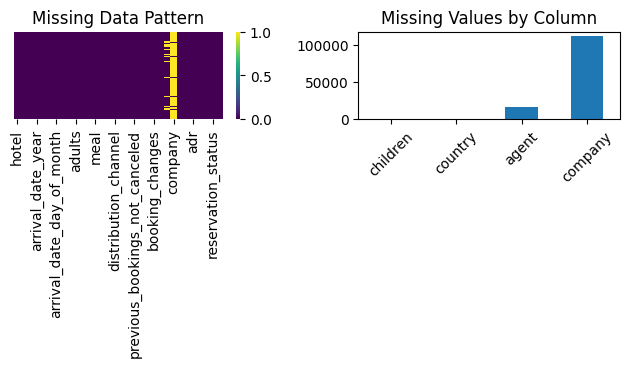

In [200]:
# Missing data heatmap
plt.subplot(2, 2, 1)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern')

# Missing data bar plot
plt.subplot(2, 2, 2)
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts.plot(kind='bar')
plt.title('Missing Values by Column')
plt.xticks(rotation=45)

plt.tight_layout()

Original shape: (119390, 32)

Missing values before cleanup:
children         4
country        488
agent        16340
company     112593
dtype: int64

Missing values after cleanup:
Series([], dtype: int64)

Unique values per categorical column:
reservation_status_date    926
country                    177
assigned_room_type          12
arrival_date_month          12
reserved_room_type          10
market_segment               8
distribution_channel         5
meal                         5
customer_type                4
deposit_type                 3
reservation_status           3
hotel                        2
dtype: int64

Low-cardinality columns (One-Hot Encode): ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
High-cardinality columns (Label Encode): ['country', 'reservation_status_date']

Data shape after optimized encoding: (119390, 86)
Scaling complet

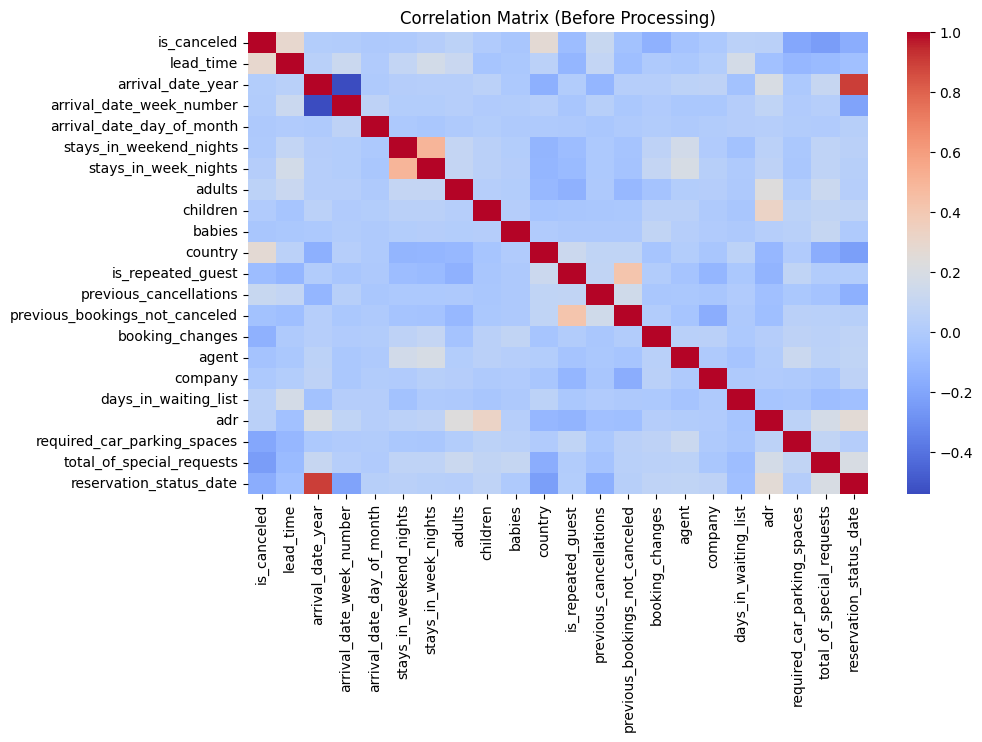

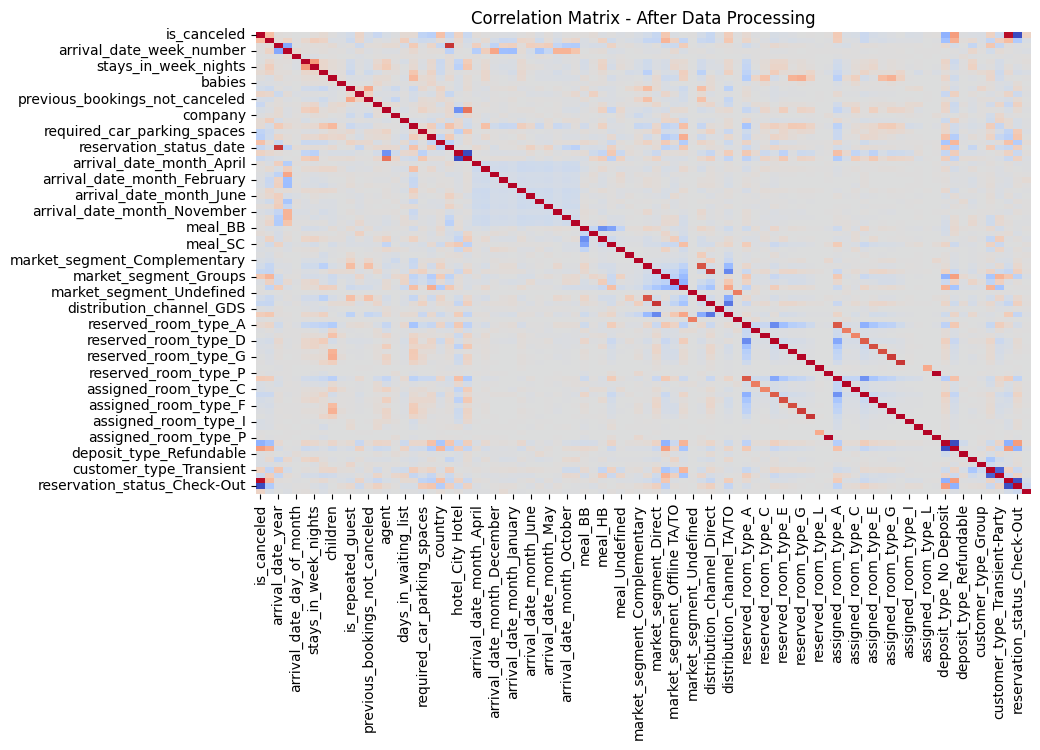

In [240]:
# This code cell is by Cristopher Cequea-Rivero

# Load Original Dataset
df = pd.read_csv('hotel_bookings.csv')
print(f"Original shape: {df.shape}")

# (1.) Handling Missing Values

print("\nMissing values before cleanup:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Identify numeric and categorical columns automatically
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numeric NaN values with median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill categorical NaN values with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after cleanup:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# (2.) Encoding Categorical Variables
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

# Check unique value counts
print("\nUnique values per categorical column:")
print(df[cat_cols].nunique().sort_values(ascending=False))

# Split categorical columns by cardinality
low_cardinality = [col for col in cat_cols if df[col].nunique() <= 20]
high_cardinality = [col for col in cat_cols if df[col].nunique() > 20]

print(f"\nLow-cardinality columns (One-Hot Encode): {low_cardinality}")
print(f"High-cardinality columns (Label Encode): {high_cardinality}")

# One-Hot Encode low-cardinality categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
encoded_sparse = encoder.fit_transform(df[low_cardinality])
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_sparse, columns=encoder.get_feature_names_out(low_cardinality))

# Label Encode high-cardinality features
for col in high_cardinality:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Combine encoded + numeric data
df_encoded = pd.concat([
    df[num_cols].reset_index(drop=True),
    df[high_cardinality].reset_index(drop=True),
    encoded_df.reset_index(drop=True)
], axis=1)

print(f"\nData shape after optimized encoding: {df_encoded.shape}")

# (3.) Feature Scaling (MinMaxScaler)
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
print("Scaling complete.")

# (4.) Normalization (StandardScaler for distribution adjustment)
scaler_norm = StandardScaler()
normalized_data = pd.DataFrame(scaler_norm.fit_transform(scaled_data), columns=scaled_data.columns)
print(f"\nData shape after scaling and normalization: {normalized_data.shape}")

# Correlation Matrix for Numerical Columns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix (Before Processing)')
plt.show()

# (5.) Correlation Heatmap After Processing
plt.figure(figsize=(10,6))
sns.heatmap(normalized_data.corr(numeric_only=True), cmap='coolwarm', cbar=False)
plt.title('Correlation Matrix - After Data Processing')
plt.show()

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


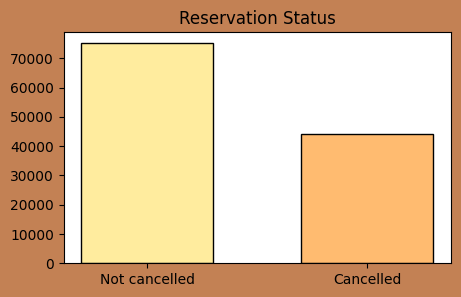

In [201]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])

plt.figure(figsize = (5,3),facecolor="#C38154")
plt.title('Reservation Status')
plt.bar(['Not cancelled' , 'Cancelled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.6,color=colors)
plt.show()

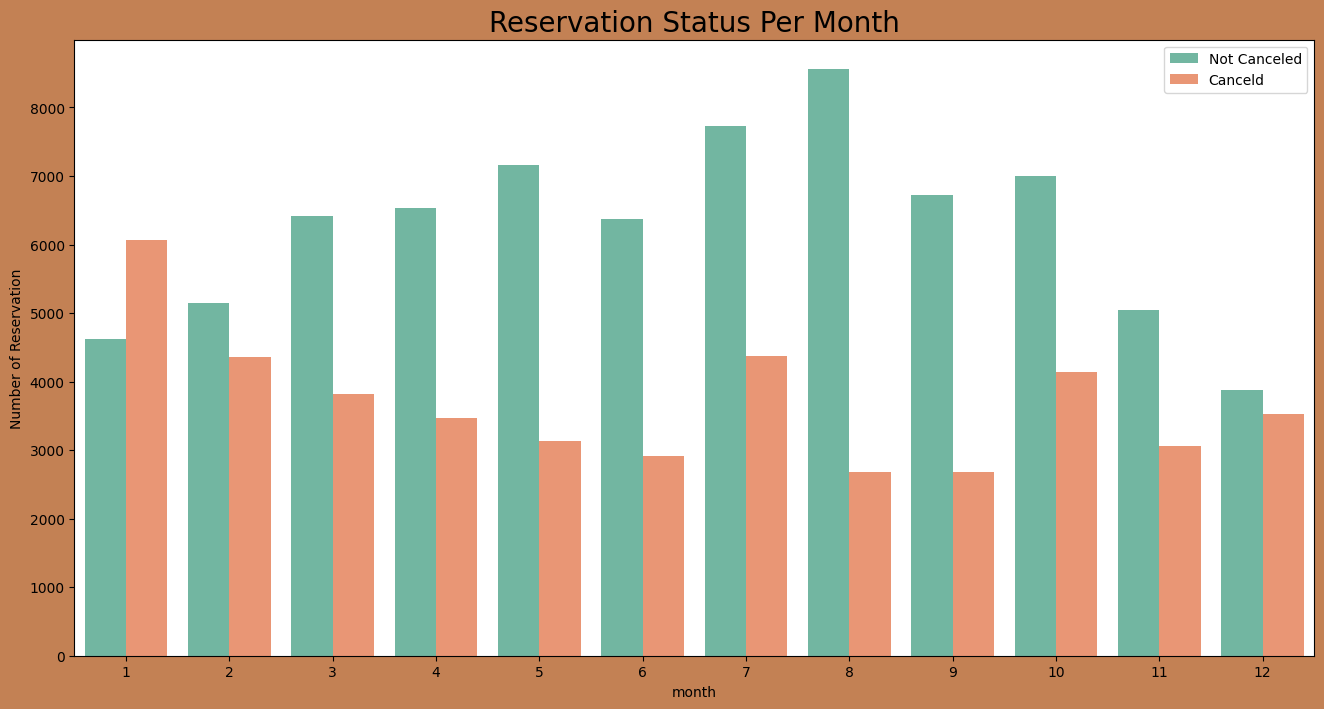

In [203]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8), facecolor='#C38154')
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = 'Set2')
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation Status Per Month', size = 20)
plt.xlabel('month')
plt.ylabel('Number of Reservation')
plt.legend(['Not Canceled','Canceld'])
plt.show()

# Data Processing

In [215]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [219]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103890,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


# Filling Nan and Null values with appropriate values

In [220]:
# Fill missing values in 'children' with the mean
df['children'].fillna(df['children'].mean(), inplace=True)

# Fill missing values in 'country' with the mode
df['country'].fillna(df['country'].mode()[0], inplace=True)

print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       

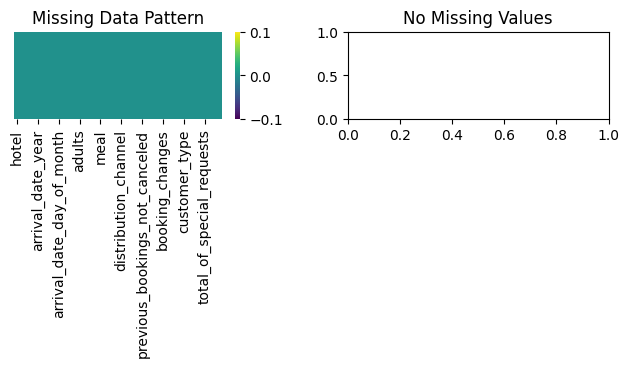

In [222]:
# Missing data heatmap
plt.subplot(2, 2, 1)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern')

# Missing data bar plot
plt.subplot(2, 2, 2)
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
if not missing_counts.empty:
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
else:
    plt.title('No Missing Values')

plt.tight_layout()

# Scaling

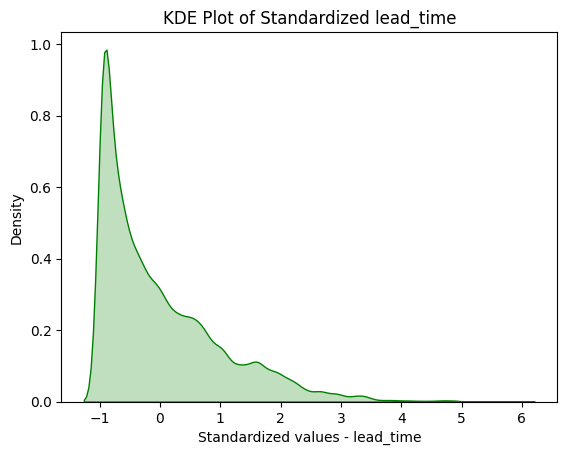

In [226]:

#call the standard scaler
std_scaler = StandardScaler()

# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

if 'is_canceled' in numerical_cols:
    numerical_cols.remove('is_canceled')

# Apply the scaler to the numerical columns
df_scaled_numerical = std_scaler.fit_transform(df[numerical_cols])

# Convert the scaled data back to a DataFrame for easier plotting with column names
df_scaled_numerical = pd.DataFrame(df_scaled_numerical, columns=numerical_cols)


# use seaborn for KDE plot - select one of the scaled numerical columns to plot
column_to_plot = 'lead_time'

if column_to_plot in df_scaled_numerical.columns:
    sns.kdeplot(df_scaled_numerical[column_to_plot], fill=True, color = 'Green')
    #Label the plot
    plt.xlabel(f'Standardized values - {column_to_plot}')
    plt.title(f'KDE Plot of Standardized {column_to_plot}')
    #Print the plot
    plt.show()
else:
    print(f"Column '{column_to_plot}' not found in the scaled numerical data.")

# Normalization

In [229]:
df_processed = df.copy() # Use df which is the current dataframe

numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

print("Numerical columns statistics before scaling:")
print(df_processed[numerical_columns].describe().round(2))

Numerical columns statistics before scaling:
       is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
count    119390.00  119390.00          119390.00                 119390.00   
mean          0.37     104.01            2016.16                     27.17   
std           0.48     106.86               0.71                     13.61   
min           0.00       0.00            2015.00                      1.00   
25%           0.00      18.00            2016.00                     16.00   
50%           0.00      69.00            2016.00                     28.00   
75%           1.00     160.00            2017.00                     38.00   
max           1.00     737.00            2017.00                     53.00   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count                  119390.00                119390.00   
mean                       15.80                     0.93   
std                         8.78                     1.00   
min     

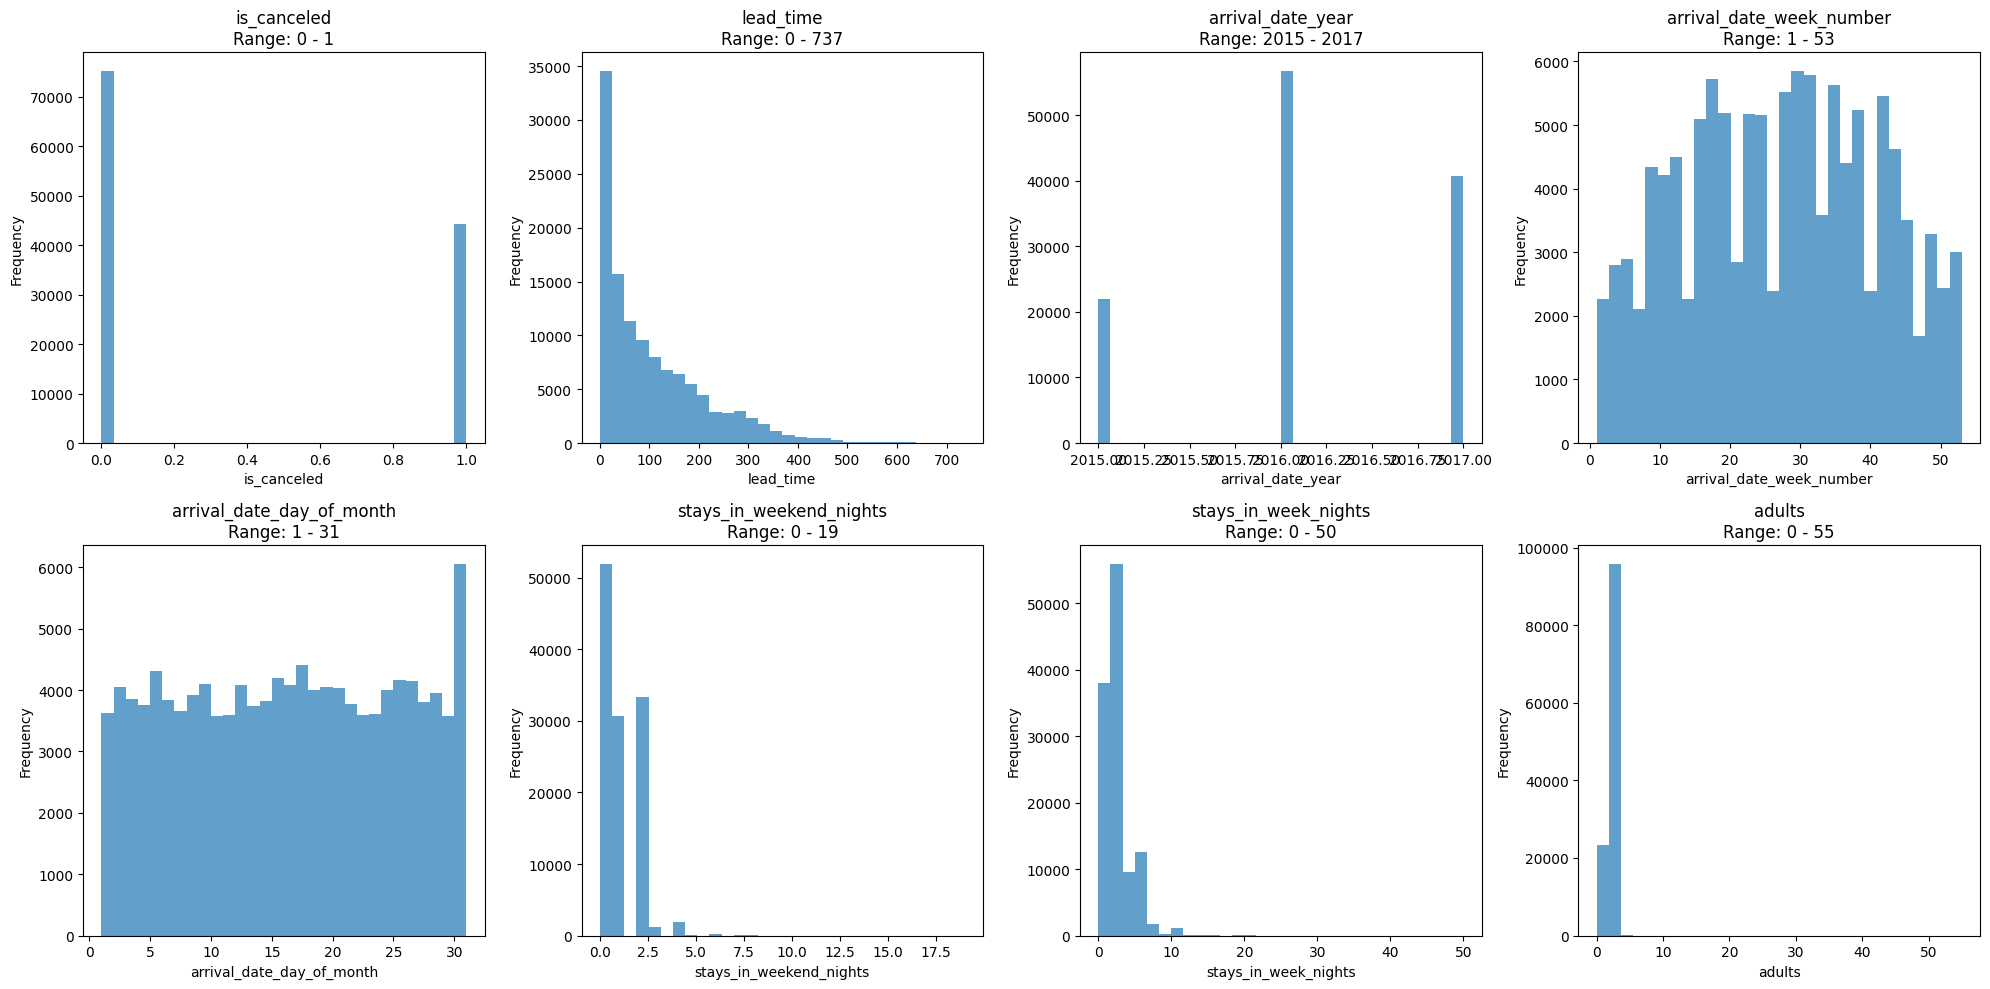

In [231]:
# Visualize the scale differences
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_columns[:8]): # Limit the loop to the first 8 columns
    axes[i].hist(df_processed[col], bins=30, alpha=0.7)
    axes[i].set_title(f'{col}\nRange: {df_processed[col].min():.0f} - {df_processed[col].max():.0f}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()